In [1]:
!pip install pandas
!pip install pymysql
import pymysql


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import warnings
import seaborn as sns

In [7]:
df0=pd.read_csv("Sales.csv")
df1=pd.read_csv("Stores.csv")
df2=pd.read_csv("Products.csv")
df3=pd.read_csv("Exchange_Rates.csv")
df4=pd.read_csv("Customers.csv",encoding='ISO-8859-1')

In [9]:
df0.drop(["Delivery Date"],axis=1,inplace=True)
df0["Order Date"]=pd.to_datetime(df0["Order Date"])
df0.columns=[i.strip().lower().replace(" ","_") for i in df0.columns]
df0.inplace=True
df0.reset_index()
df0

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


In [13]:
df0.loc[df0.duplicated(subset=["order_number"])]

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code
2,366001,2,2016-01-01,1269051,0,2007,1,USD
4,366002,2,2016-01-01,266019,0,373,1,CAD
5,366002,3,2016-01-01,266019,0,1080,4,CAD
7,366004,2,2016-01-01,1107461,38,1529,2,GBP
10,366007,2,2016-01-01,2035771,43,666,5,USD
...,...,...,...,...,...,...,...,...
62876,2243029,4,2021-02-20,887764,0,580,1,EUR
62877,2243029,5,2021-02-20,887764,0,1449,4,EUR
62878,2243029,6,2021-02-20,887764,0,1456,2,EUR
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


In [9]:
df1["Open Date"]=pd.to_datetime(df1["Open Date"])
df1.columns=[i.strip().lower().replace(" ","_") for i in df1.columns]
df1.inplace=True
df1.fillna(df1["square_meters"].mean(),inplace=True)


In [11]:
df1

,storekey,country,state,square_meters,open_date
0,1,Australia,Australian Capital Territory,595.00000,2008-01-01
1,2,Australia,Northern Territory,665.00000,2008-01-12
2,3,Australia,South Australia,2000.00000,2012-01-07
3,4,Australia,Tasmania,2000.00000,2010-01-01
4,5,Australia,Victoria,2000.00000,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.00000,2008-03-06
63,64,United States,Washington DC,1330.00000,2010-01-01
64,65,United States,West Virginia,1785.00000,2012-01-01
65,66,United States,Wyoming,840.00000,2014-01-01


In [13]:
df2['Unit Cost USD']=df2['Unit Cost USD'].replace("[/$]","",regex=True)
df2['Unit Cost USD']=[i.replace(",","")for i in df2['Unit Cost USD']]
df2['Unit Cost USD']=df2['Unit Cost USD'].astype(float)
df2['Unit Price USD']=df2['Unit Price USD'].replace("[/$]","",regex=True)
df2['Unit Price USD']=[i.replace(",","")for i in df2['Unit Price USD']]
df2['Unit Price USD']=df2['Unit Price USD'].astype(float)
df2.columns=[i.strip().lower().replace(" ","_") for i in df2.columns]
df2.reset_index(drop=True,inplace=True)
df2

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [15]:
df3["Date"]=[i.replace("/","-") for i in df3["Date"]]
df3["Date"]=pd.to_datetime(df3["Date"])
df3.columns=[i.strip().lower().replace(" ","_") for i in df3.columns]
df3["order_date"]=df3["date"]
df3.drop(["date"],axis=1,inplace=True)
df3

,currency,exchange,order_date
0,USD,1.0000,2015-01-01
1,CAD,1.1583,2015-01-01
2,AUD,1.2214,2015-01-01
3,EUR,0.8237,2015-01-01
4,GBP,0.6415,2015-01-01
...,...,...,...
11210,USD,1.0000,2021-02-20
11211,CAD,1.2610,2021-02-20
11212,AUD,1.2723,2021-02-20
11213,EUR,0.8238,2021-02-20


In [17]:
df4.drop(["Zip Code"],axis=1,inplace=True)
df4["Birthday"]=[i.replace("/","-") for i in df4["Birthday"]]
df4["Birthday"]=pd.to_datetime(df4["Birthday"])
df4.columns=[i.strip().lower().replace(" ","_") for i in df4.columns]
df4.dropna(inplace=True)
df4.reset_index(drop=True)
df4

,customerkey,gender,name,city,state_code,state,country,continent,birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,United States,North America,1937-10-12


In [19]:
df6=pd.merge(df0,df3,on='order_date',how="inner")
df6=df6.loc[df6["currency_code"]==df6["currency"]]
df6

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,currency,exchange
1,366000,1,2016-01-01,265598,10,1304,1,CAD,CAD,1.3884
5,366001,1,2016-01-01,1269051,0,1048,2,USD,USD,1.0000
10,366001,2,2016-01-01,1269051,0,2007,1,USD,USD,1.0000
16,366002,1,2016-01-01,266019,0,1106,7,CAD,CAD,1.3884
21,366002,2,2016-01-01,266019,0,373,1,CAD,CAD,1.3884
...,...,...,...,...,...,...,...,...,...,...
314395,2243030,1,2021-02-20,1216913,43,632,3,USD,USD,1.0000
314403,2243031,1,2021-02-20,511229,0,98,4,EUR,EUR,0.8238
314406,2243032,1,2021-02-20,331277,0,1613,2,CAD,CAD,1.2610
314411,2243032,2,2021-02-20,331277,0,1717,2,CAD,CAD,1.2610


In [23]:
df=pd.merge(df6,df4,on='customerkey',how="inner")
df

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,currency,exchange,gender,name,city,state_code,state,country,continent,birthday
0,366000,1,2016-01-01,265598,10,1304,1,CAD,CAD,1.3884,Male,Tyler Vaught,London,ON,Ontario,Canada,North America,1971-03-23
1,366001,1,2016-01-01,1269051,0,1048,2,USD,USD,1.0000,Male,Frank Upchurch,Auberry,CA,California,United States,North America,1995-11-20
2,366001,2,2016-01-01,1269051,0,2007,1,USD,USD,1.0000,Male,Frank Upchurch,Auberry,CA,California,United States,North America,1995-11-20
3,366002,1,2016-01-01,266019,0,1106,7,CAD,CAD,1.3884,Female,Joan Roche,Red Deer,AB,Alberta,Canada,North America,1962-08-24
4,366002,2,2016-01-01,266019,0,373,1,CAD,CAD,1.3884,Female,Joan Roche,Red Deer,AB,Alberta,Canada,North America,1962-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62849,2243030,1,2021-02-20,1216913,43,632,3,USD,USD,1.0000,Male,Donald Woodie,Garden Grove,CA,California,United States,North America,1939-04-16
62850,2243031,1,2021-02-20,511229,0,98,4,EUR,EUR,0.8238,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,Germany,Europe,1940-03-10
62851,2243032,1,2021-02-20,331277,0,1613,2,CAD,CAD,1.2610,Male,William Rochelle,Calgary,AB,Alberta,Canada,North America,1993-05-25
62852,2243032,2,2021-02-20,331277,0,1717,2,CAD,CAD,1.2610,Male,William Rochelle,Calgary,AB,Alberta,Canada,North America,1993-05-25


In [25]:
df5=pd.merge(df,df2,on='productkey',how="inner")	
df5

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,currency,exchange,...,birthday,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,366000,1,2016-01-01,265598,10,1304,1,CAD,CAD,1.3884,...,1971-03-23,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,1269051,0,1048,2,USD,USD,1.0000,...,1995-11-20,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,1269051,0,2007,1,USD,USD,1.0000,...,1995-11-20,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,266019,0,1106,7,CAD,CAD,1.3884,...,1962-08-24,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,266019,0,373,1,CAD,CAD,1.3884,...,1962-08-24,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62849,2243030,1,2021-02-20,1216913,43,632,3,USD,USD,1.0000,...,1939-04-16,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers
62850,2243031,1,2021-02-20,511229,0,98,4,EUR,EUR,0.8238,...,1940-03-10,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio
62851,2243032,1,2021-02-20,331277,0,1613,2,CAD,CAD,1.2610,...,1993-05-25,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62852,2243032,2,2021-02-20,331277,0,1717,2,CAD,CAD,1.2610,...,1993-05-25,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys


In [27]:
df7=pd.merge(df5,df1,on='storekey',how='inner')	
df7

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,currency,exchange,...,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,country_y,state_y,square_meters,open_date
0,366000,1,2016-01-01,265598,10,1304,1,CAD,CAD,1.3884,...,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.00000,2015-04-04
1,366001,1,2016-01-01,1269051,0,1048,2,USD,USD,1.0000,...,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,1402.19697,2010-01-01
2,366001,2,2016-01-01,1269051,0,2007,1,USD,USD,1.0000,...,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,1402.19697,2010-01-01
3,366002,1,2016-01-01,266019,0,1106,7,CAD,CAD,1.3884,...,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,1402.19697,2010-01-01
4,366002,2,2016-01-01,266019,0,373,1,CAD,CAD,1.3884,...,166.20,326.00,301,Laptops,3,Computers,Online,Online,1402.19697,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62849,2243030,1,2021-02-20,1216913,43,632,3,USD,USD,1.0000,...,70.87,139.00,305,Projectors & Screens,3,Computers,United States,Alaska,1190.00000,2015-01-01
62850,2243031,1,2021-02-20,511229,0,98,4,EUR,EUR,0.8238,...,55.18,120.00,106,Bluetooth Headphones,1,Audio,Online,Online,1402.19697,2010-01-01
62851,2243032,1,2021-02-20,331277,0,1613,2,CAD,CAD,1.2610,...,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,1402.19697,2010-01-01
62852,2243032,2,2021-02-20,331277,0,1717,2,CAD,CAD,1.2610,...,32.25,70.13,702,Download Games,7,Games and Toys,Online,Online,1402.19697,2010-01-01


In [31]:
df7.nunique()

order_number      26313
line_item             7
order_date         1641
customerkey       11878
storekey             58
productkey         2492
quantity             10
currency_code         5
currency              5
exchange           2345
gender                2
name              11774
city               6561
state_code          448
state_x             490
country_x             8
continent             3
birthday           9374
product_name       2492
brand                11
color                16
unit_cost_usd       480
unit_price_usd      426
subcategorykey       32
subcategory          32
categorykey           8
category              8
country_y             9
state_y              58
square_meters        33
open_date            23
dtype: int64

In [33]:
df7.describe(include="object")


,currency_code,currency,gender,name,city,state_code,state_x,country_x,continent,product_name,brand,color,subcategory,category,country_y,state_y
count,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854,62854
unique,5,5,2,11774,6561,448,490,8,3,2492,11,16,32,8,9,58
top,USD,USD,Male,Gaspare Trevisan,Toronto,CA,California,United States,North America,Adventure Works Desktop PC2.30 MD230 Black,Contoso,Black,Movie DVD,Computers,United States,Online
freq,33767,33767,31787,36,683,3669,3629,33767,39182,162,15942,16532,9165,14022,26555,13163


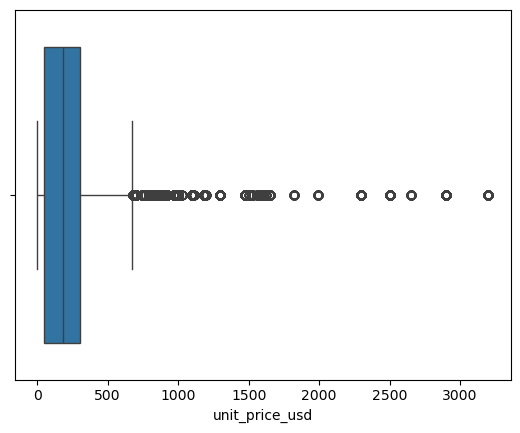

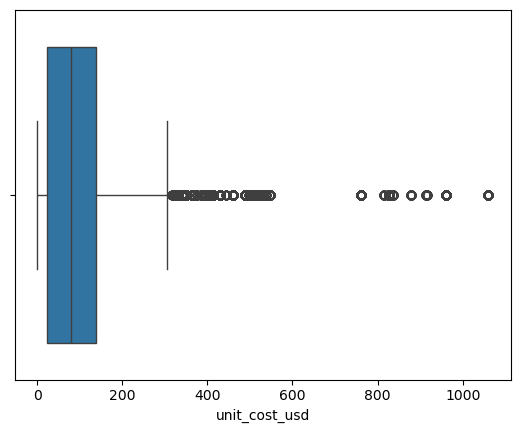

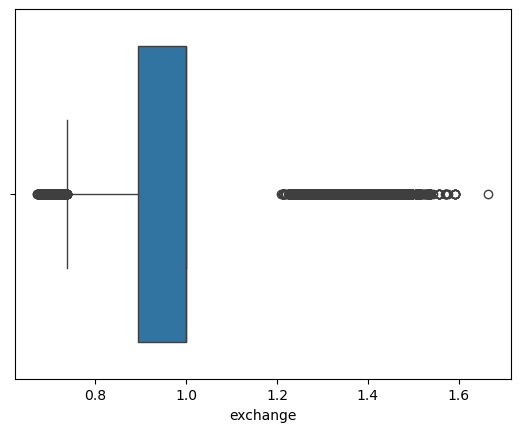

In [29]:
#outliers
for i in ['unit_price_usd','unit_cost_usd','exchange']:
  sns.boxplot(data=df7,x=i)
  pt.show()  

In [35]:
def outlier(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw    

In [43]:
outlier(df7['unit_cost_usd'])

(-152.50499999999997, 312.97499999999997)

In [37]:
for i in ['unit_price_usd','unit_cost_usd','exchange']:
    lw,uw=outlier(df7[i])
    df7[i]=np.where(df7[i]<lw,lw,df7[i])
    df7[i]=np.where(df7[i]>uw,uw,df7[i])
 

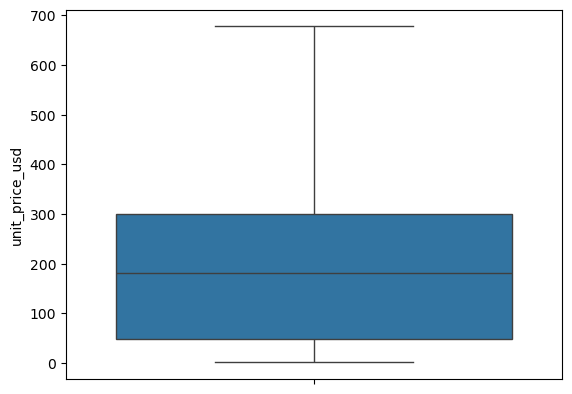

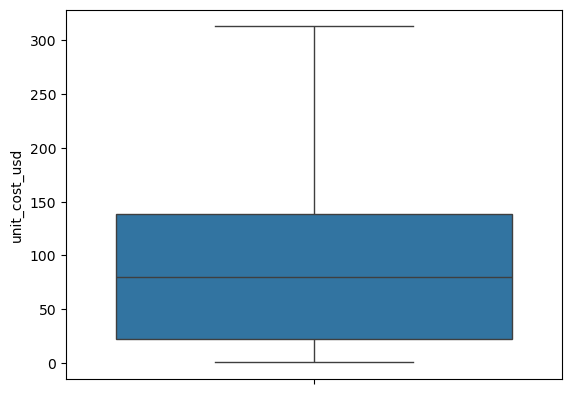

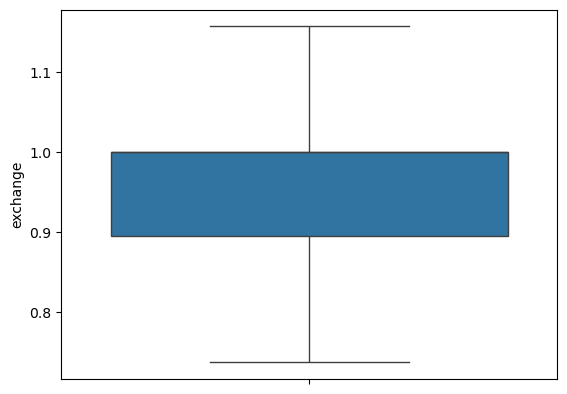

In [68]:
for i in ['unit_price_usd','unit_cost_usd','exchange']:
    sns.boxplot(df7[i])
    pt.show()

In [49]:
df7.drop("currency",axis=1,inplace=True)

In [72]:
df7["gender"].value_counts()

gender
Male      31787
Female    31067
Name: count, dtype: int64

In [98]:
import plotly.express as px

<Axes: ylabel='count'>

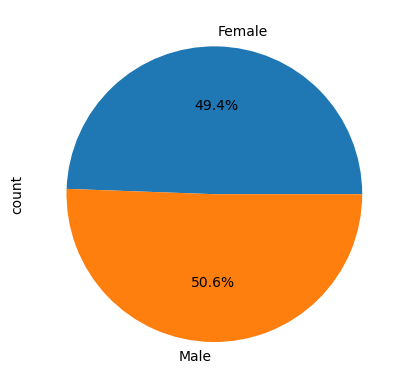

In [132]:
df7["gender"].value_counts(ascending=True).plot(kind="pie",autopct='%1.1f%%')

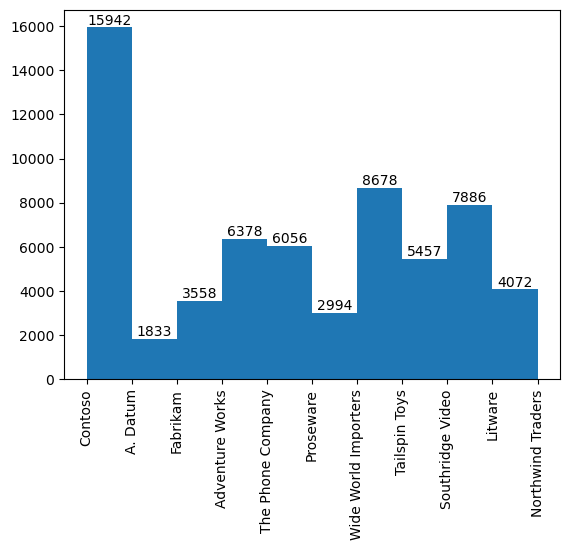

In [253]:
pt.hist(data=df7,x="brand",color='green')
count,edges,bar=pt.hist(data=df7,x="brand")
pt.bar_label(bar)
pt.xticks(rotation=90,ha='center')
pt.show()

Text(0.5, 1.0, 'Mosted used Brand in Countries')

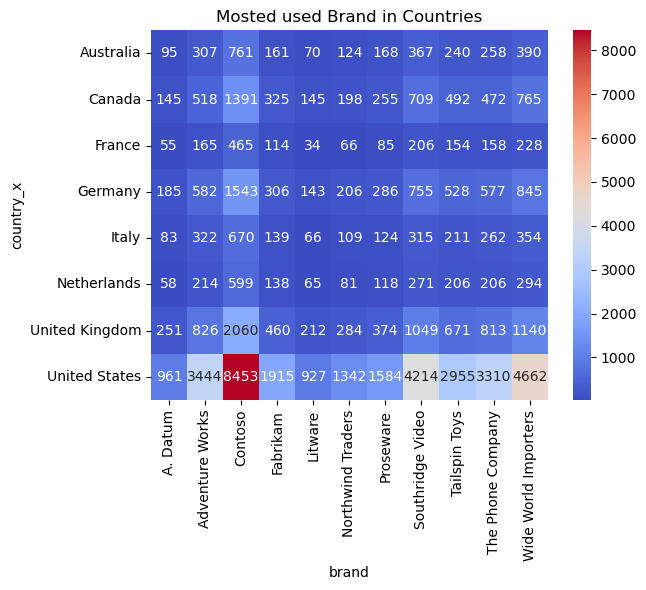

In [321]:
df7["country_x"].value_counts()
df7["brand"].value_counts()
pivot_table = df7.pivot_table(index='country_x', columns='brand', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm")
pt.xticks(rotation=90,ha="center")
pt.title("Mosted used Brand in Countries")

Text(0.5, 1.0, 'Mosted liked color by customers')

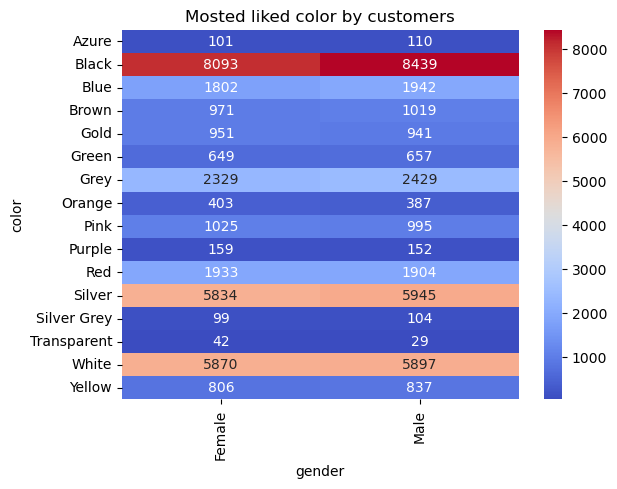

In [344]:
pivot_table = df7.pivot_table(index='color', columns='gender', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm")
pt.xticks(rotation=90,ha="center")
pt.title("Mosted liked color by customers")

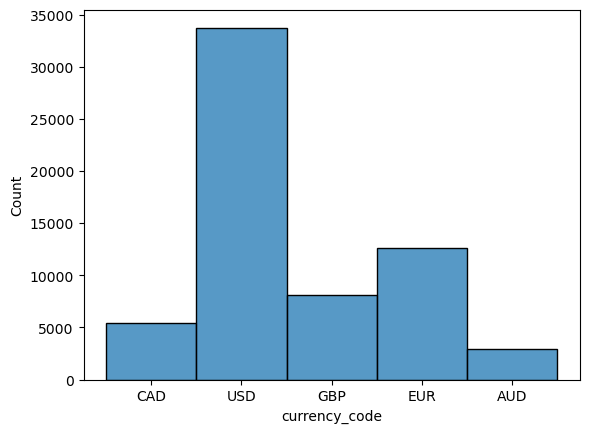

In [335]:
sns.histplot(data=df7,x="currency_code")
pt.show()

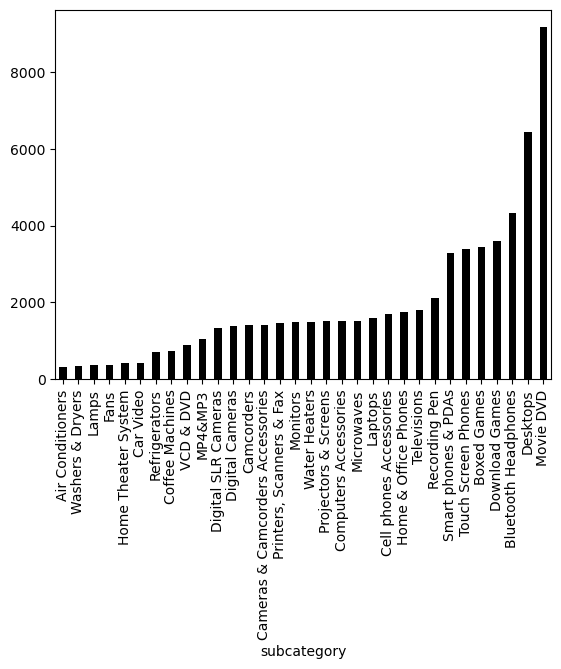

In [370]:
df7["subcategory"].value_counts(ascending=True).plot(kind="bar",color="black")
pt.show()

<Axes: ylabel='count'>

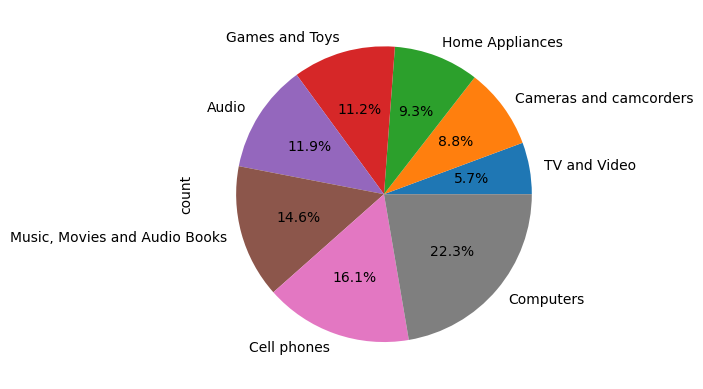

In [360]:
df7["category"].value_counts(ascending=True).plot(kind="pie",color="black",autopct="%1.1f%%")

In [372]:
w1=",".join(f"{i2} {j3}"
            for i2,j3 in zip(df7.columns,df7.dtypes)).replace("object","text").replace('int64','int').replace('float64','float').replace('datetime64[ns]','datetime')

In [374]:
r2=f"create table data_info ({w1})"  
myconnection=pymysql.connect(host='127.0.0.1',user='root',password='Ramb@2001',database='data_analys')
myconnection.cursor().execute(r2) 
r3=f"insert into data_info values"
for i in range(len(df7)):
    myconnection.cursor().execute(f"insert into data_info values {tuple(df7.iloc[i])}")
    myconnection.commit()

In [ ]:
with analy as (select * from data_info), 
analy_2 as (select  category,gender,birthday,brand from analy group by category,gender,birthday,brand)
select  *,timestampdiff(year,birthday,CURDATE()) as age from analy_2 where gender='male' and timestampdiff(year,birthday,CURDATE())<=30 or  gender='female' and timestampdiff(year,birthday,CURDATE())<=30;
with analy as (select * from data_info), 
analy_2 as (select  category,gender,birthday,brand from analy group by category,gender,birthday,brand)
select  *,timestampdiff(year,birthday,CURDATE()) as age from analy_2 where gender='male' and timestampdiff(year,birthday,CURDATE())>=31 or  gender='female' and timestampdiff(year,birthday,CURDATE())>=31;
 select  count(*)as highusers,brand,continent,gender from data_info group by brand,continent,gender ;
select rank() over( order by sum(quantity)  desc) as rank_top,sum(quantity) as average_order,product_name from data_info group by product_name limit 50 ;
select count(*) as users,storekey,country_y as country from data_info group by storekey,country_y order by storekey asc;
select count(*),color,brand,gender from data_info group by color,brand,gender order by count(*) desc;
select count(*) as everyday_orders, year(order_date) as year,sum(quantity) as orders from data_info group by order_date;
select name,gender,continent,rank() over(order by sum(quantity) desc) as high_purchased,sum(quantity)as purchasing,category,product_name from data_info group by name,product_name,gender,continent,category limit 50;
select product_name,unit_cost_usd,unit_price_usd,round(unit_price_usd-unit_cost_usd,2) as profit from data_info group by product_name,unit_cost_usd,unit_price_usd;
select subcategory,rank()over(order by sum(quantity) desc) as top_products,sum(quantity) as top_list from data_info group by subcategory;